In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np  
import matplotlib.patches as mpatches

In [16]:
def GetSum(index,df_g,keys_list):
    df = df_g.get_group(keys_list[index])
    df['NASA']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
    return df

def CovertdftoTTest(df_zig,condition):
    df_tt = pd.DataFrame(columns=['Condition', 'Subject','Score'])
    # print(df_zig['NASA'])
    df_tt['Score'] = df_zig['NASA'].values
    df_tt['Subject'] = df_zig.Subject.values
    df_tt['Condition'] = condition
    return df_tt

In [49]:
def ThreeGroupBoxPlot(h,a,t,yt,ymax,ymin,s4,seg=3,s_tx_h=0.5,lh=1,ll=2.5,figsize=(8,8)):   
    all_data = [h,a]
    labels = ['Human-Like', 'Traditional',]
    labels2 = ['', '','']

    fig, (ax1)= plt.subplots(nrows=1, ncols=1, figsize=figsize)
    size_ax = 16
    size_title = 20
    size_group = 14

    # rectangular box plot
    bplot1 = ax1.boxplot(all_data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels,
                        widths = 0.2,
                        # positions = [1,4,7,10],
                        showfliers=False, ### ignore outliners
                        )  # will be used to label x-ticks
    ax1.set_title(t,fontsize=size_title)


    colors = [(255/255,228/255,181/255, 1), (77/255, 175/255, 75/255, 1), (55/255, 126/255, 184/255, 1)]
   
    for patch, color in zip(bplot1['boxes'], colors):
        # change outline color
        patch.set(color='w', linewidth=1)
        # change fill color
        patch.set(facecolor =color)



    ### custome legend
    trial_1 = mpatches.Patch(color=(153/255, 153/255, 153/255, 1), label='First Trial')
    trial_2 = mpatches.Patch(facecolor =(153/255, 153/255, 153/255, 0.5), label='Second Trial',hatch = '/',edgecolor='w',)
    # ax1.legend(handles=[trial_1,trial_2], handlelength=ll, handleheight=lh,loc='upper right')
    # plt.legend(handles=[trial_1,trial_2],)



    # adding horizontal grid lines
    ax1.yaxis.grid(True)
    ax1.set_ylim([ymin,ymax])
    ax1.set_xlabel("Conditions",fontsize=size_ax)
    ax1.set_ylabel(yt,fontsize=size_ax)
    # ax1.set_xticks(np.arange(4))
    ax1.set_xticklabels(['Human-Like', 'Traditional',],
    ha ='center',
    fontsize=size_group
    )

    ## plot significant level
    max = h.max()
    if(h.max()<a.max()):
        max = a.max()

    if(s4):
        x1 =1
        x2 = 2
        y, h, col = max + seg*2,s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s4, ha='center', va='bottom', color=col)



    plt.show()

In [14]:
nasa = './Survey/NASA.csv'
df_nasa_all = pd.read_csv(nasa)
df_nasa_g_condition = df_nasa_all.groupby('Conditions')
keys = df_nasa_g_condition.groups.keys()
keys_list = list(keys) # 0 automatic 2 control 4 haptic 6 visual 
print(keys_list)

In [19]:
df_a1= GetSum(0,df_nasa_g_condition,keys_list)
human = df_a1['NASA']


df_c1= GetSum(1,df_nasa_g_condition,keys_list)
traditional = df_c1['NASA']

df_human = CovertdftoTTest(df_a1,'Human')
# print(df_human)

df_tradition = CovertdftoTTest(df_c1,'Tradition')
# print(df_tradition)


df_tt_all = pd.DataFrame()

df_tt_all =df_tt_all.append([df_human,df_tradition], ignore_index=True)

<ipython-input-16-ccc92c8fbc50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NASA']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
<ipython-input-16-ccc92c8fbc50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NASA']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
<ipython-input-19-e9db3a57b867>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [20]:
pg.pairwise_ttests(dv='Score', within='Condition', subject='Subject',
                   data=df_tt_all, parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,hedges
0,Condition,Human,Tradition,True,False,40.0,two-sided,0.277,-0.444


### SART 

In [58]:
nasa = './Survey/SART.csv'
df_nasa_all = pd.read_csv(nasa)
df_nasa_g_condition = df_nasa_all.groupby('Conditions')
keys = df_nasa_g_condition.groups.keys()
keys_list = list(keys) # 0 automatic 2 control 4 haptic 6 visual 
print(keys_list)

['Human-like IK', 'Traditional IK']


In [59]:
df_a1= GetSum(0,df_nasa_g_condition,keys_list)
human = df_a1['NASA']


df_c1= GetSum(1,df_nasa_g_condition,keys_list)
traditional = df_c1['NASA']

df_human = CovertdftoTTest(df_a1,'Human')
# print(df_human)

df_tradition = CovertdftoTTest(df_c1,'Tradition')
# print(df_tradition)


df_tt_all = pd.DataFrame()

df_tt_all =df_tt_all.append([df_human,df_tradition], ignore_index=True)

<ipython-input-16-ccc92c8fbc50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NASA']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
<ipython-input-16-ccc92c8fbc50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NASA']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
<ipython-input-59-e9db3a57b867>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [60]:
pg.pairwise_ttests(dv='Score', within='Condition', subject='Subject',
                   data=df_tt_all, parametric=False).round(3)

d:\apps\Anaconda\lib\site-packages\scipy\stats\_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,hedges
0,Condition,Human,Tradition,True,False,34.0,two-sided,0.257,0.345


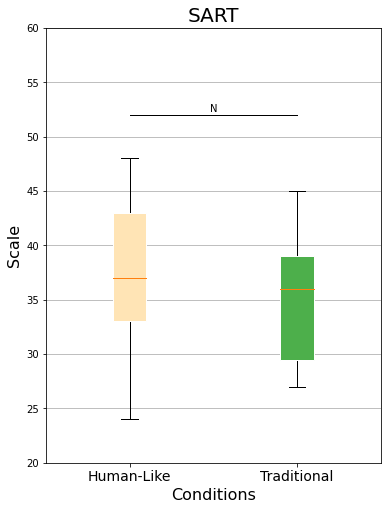

In [62]:

ThreeGroupBoxPlot(human,traditional,
t = 'SART',
yt ="Scale",
figsize=(6,8),
ymax =60,ymin=20,
s4 ='N', # h-a
ll=3,
s_tx_h=0.1,
seg =2,
)

### Trust 